# Exercise

## Exploring Kernel Differences

To understand how different SVM kernels affect classification performance and to visualize decision boundaries for linear and non-linear datasets.

A) Dataset: You can use the popular Iris dataset or generate a synthetic dataset using make_moons or make_circles from sklearn.datasets.

B) Data Preparation: Load the dataset using sklearn.datasets.
If using the Iris dataset, select two features for a 2D visualization (e.g., sepal length and sepal width). Split the dataset into training and testing sets (e.g., 70% train, 30% test).

C) Create a function to train and visualize SVM with different kernels.
Experiment with Different Kernels:

D) Call the function for each kernel type: ['linear', 'poly', 'rbf', 'sigmoid']

E) After visualizing the decision boundaries, evaluate the performance of each SVM model on the test set.

##Discussion Questions:

1) How do the decision boundaries change with different kernel types?

2) Which kernel provided the best performance based on the classification report? Why do you think that is?

3) What are the advantages and disadvantages of using non-linear kernels compared to a linear kernel?

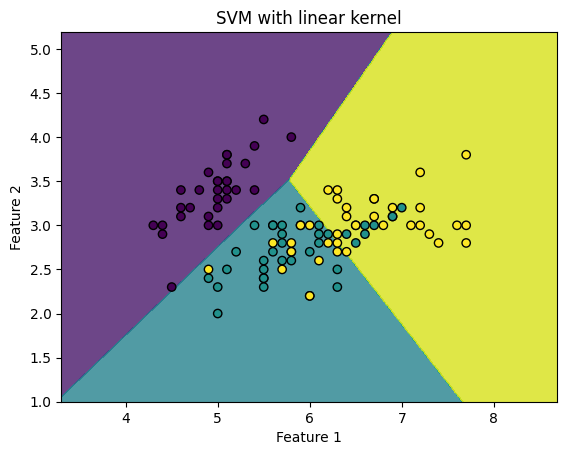

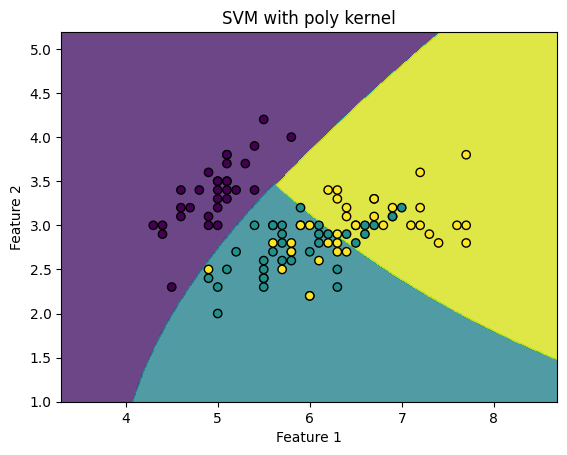

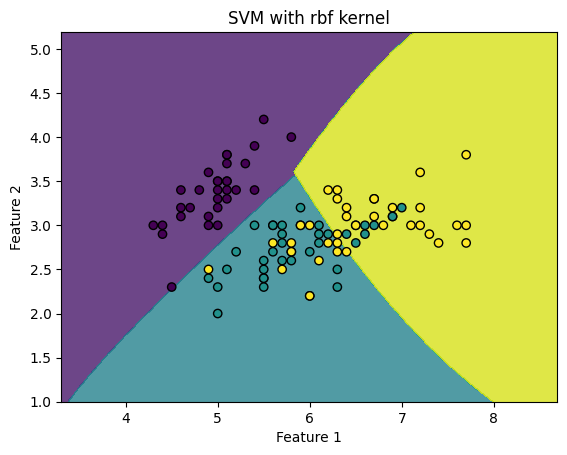

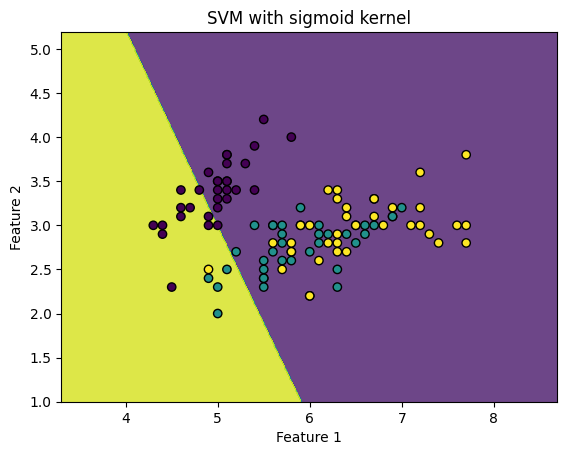

Kernel: linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45

[[19  0  0]
 [ 0  7  6]
 [ 0  3 10]]
Kernel: poly
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.54      0.54      0.54        13
           2       0.54      0.54      0.54        13

    accuracy                           0.73        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.73      0.73      0.73        45

[[19  0  0]
 [ 0  7  6]
 [ 0  6  7]]
Kernel: rbf
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Function to plot SVM with different kernels
def plot_svm_kernel(X, y, kernel):
    svc = SVC(kernel=kernel)
    svc.fit(X, y)

    # Create a mesh grid for visualization
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(f'SVM with {kernel} kernel')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Load dataset (for example, Iris)
iris = datasets.load_iris()
X = iris.data[:, :2]  # using only the first two features
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot SVM with different kernels
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    plot_svm_kernel(X_train, y_train, kernel)

# Evaluate SVM performance with different kernels
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    svc = SVC(kernel=kernel)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)

    print(f'Kernel: {kernel}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
